In [25]:
import numpy as np

class KMeans:
  def __init__(self, k, max_iterations = 100):
    self.k = k
    self.max_iterations = max_iterations

  def fit(self, X):
    self.centroids = X[np.random.choice(range(len(X)), self.k, replace = False)]

    for i in range(self.max_iterations):
      #Cluster Assignments
      cluster_assign = []
      for j in range(len(X)):
        # print("X[j] = ", X[j])
        # print("self.centroids = ", self.centroids)
        distances = np.linalg.norm(self.centroids - X[j], axis = 1)
        # print("self.centroids - X[j]: ",  self.centroids - X[j])
        cluster_assign.append(np.argmin(distances))


      #Recalculate clusters
      for k in range(self.k):
        cluster_points = X[np.where(np.array(cluster_assign) == k)]
        if len(cluster_points) > 0:
          self.centroids[k] = np.mean(cluster_points, axis = 0)

      if i > 0 and np.array_equal(self.centroids, prev_centroids):
        break
      prev_centroids = np.copy(self.centroids)

    self.cluster_assign = cluster_assign

  def predict(self, X):
    cluster_assign = []
    for i in range(len(X)):
      distances = np.linalg.norm(self.centroids - X[i], axis = 1)
      cluster_assign.append(np.argmin(distances))
    return cluster_assign







In [33]:
x1 = np.random.randn(5,2) + 5
x2 = np.random.randn(5,2) - 5
X = np.concatenate([x1, x2], axis = 0)

print("X = ", X)

kmeans = KMeans(k=2)
kmeans.fit(X)

cluster_assign = kmeans.predict(X)

print(cluster_assign)

print(kmeans.centroids)


X =  [[ 4.58430931  4.0957114 ]
 [ 5.80018644  3.55296096]
 [ 5.76864307  5.38383748]
 [ 5.66377866  3.63427579]
 [ 3.79867631  3.70291014]
 [-3.75384116 -5.26070384]
 [-4.55587384 -4.77440369]
 [-5.15795043 -4.68236721]
 [-5.00929488 -6.26674291]
 [-4.48887041 -5.90128668]]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[[-4.59316614 -5.37710087]
 [ 5.12311876  4.07393915]]


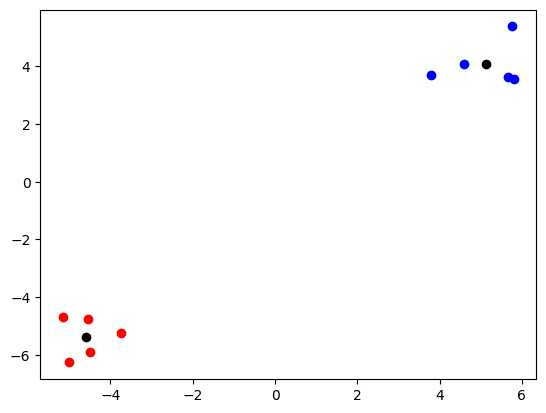

In [34]:
import matplotlib.pyplot as plt

colors = ['r', 'b']

for i in range(kmeans.k):
  plt.scatter(X[np.where(np.array(cluster_assign) == i)][:,0],
              X[np.where(np.array(cluster_assign) == i)][:,1],
              color = colors[i])
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], color = 'black', marker = 'o')

plt.show()